# 02 Cleaning and EDA

What to do in this notebook:
- Load the unified dataset (imdb_reviews.csv)
- Clean the text
- Explore the label and split distributions
- Look at frequent words in positive vs negative reviews

In [62]:
# Import
import pandas as pd
import re
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud


In [2]:
df = pd.read_csv("../data/imdb_reviews.csv")
print(df.shape)
df.head()

(50000, 3)


,review,label,split
0,Bromwell High is a cartoon comedy. It ran at t...,pos,train
1,Homelessness (or Houselessness as George Carli...,pos,train
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos,train
3,This is easily the most underrated film inn th...,pos,train
4,This is not the typical Mel Brooks film. It wa...,pos,train


## Text Cleaning

In [3]:
# Lowercase the text
df['review'] = df['review'].str.lower()
df['label'] = df['label'].str.lower()
df['split'] = df['split'].str.lower()

# Remove tags
df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, features='html.parser').get_text())

# Remove extra whitespace
df['review'] = df['review'].str.strip()
df['review'] = df['review'].replace(r'\s+', " ", regex=True)

In [34]:
df.tail()

,review,label,split,word_count
49995,i occasionally let my kids watch this garbage ...,neg,test,102
49996,when all we have anymore is pretty much realit...,neg,test,163
49997,the basic genre is a thriller intercut with an...,neg,test,260
49998,four things intrigued me as to this film - fir...,neg,test,126
49999,david bryce's comments nearby are exceptionall...,neg,test,388


In [5]:
df.dtypes

review    object
label     object
split     object
dtype: object

In [6]:
df.describe()

,review,label,split
count,50000,50000,50000
unique,49581,2,2
top,loved today's show!!! it was a variety and not...,pos,train
freq,5,25000,25000


<Axes: title={'center': 'Pos vs. Neg Reviews'}, xlabel='Review Type', ylabel='Count'>

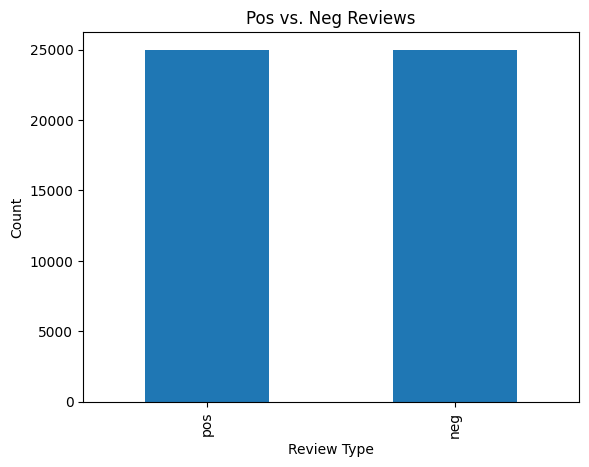

In [10]:
# Plot number of positive vs negative reviews
df['label'].value_counts().plot(kind='bar', title='Pos vs. Neg Reviews', xlabel='Review Type', ylabel='Count')

<Axes: title={'center': 'Train vs. Test Reviews'}, xlabel='Review Type', ylabel='Count'>

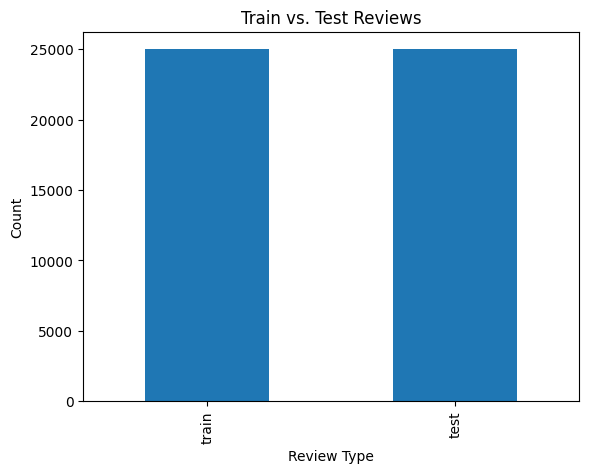

In [11]:
# Plot number of train vs test reviews
df['split'].value_counts().plot(kind='bar', title='Train vs. Test Reviews', xlabel='Review Type', ylabel='Count')

In [12]:
# Count the amount of words in the reviews column
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df[['review', 'word_count']].head()

,review,word_count
0,bromwell high is a cartoon comedy. it ran at t...,140
1,homelessness (or houselessness as george carli...,420
2,brilliant over-acting by lesley ann warren. be...,147
3,this is easily the most underrated film inn th...,124
4,this is not the typical mel brooks film. it wa...,120


In [13]:
df['word_count'].describe()

count    50000.000000
mean       227.114620
std        168.278914
min          4.000000
25%        124.000000
50%        170.000000
75%        275.000000
max       2450.000000
Name: word_count, dtype: float64

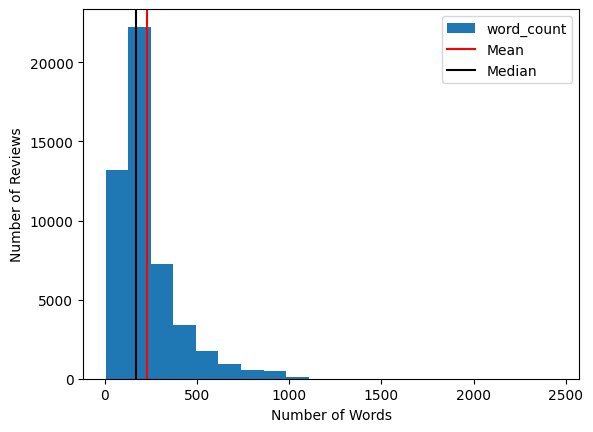

In [29]:
# Plot the amount of words in the reviews
df['word_count'].plot(kind='hist', bins=20, xlabel='Number of Words', ylabel='Number of Reviews')
plt.axvline(x=df['word_count'].mean(), label='Mean', color='red')
plt.axvline(x=df['word_count'].median(), label='Median', color='black')
plt.legend()

### Count the most common/powerful words

In [38]:
df['tokens'] = df['review'].apply(lambda x: x.split())
df[['review', 'tokens']].head()

,review,tokens
0,bromwell high is a cartoon comedy. it ran at t...,"[bromwell, high, is, a, cartoon, comedy., it, ..."
1,homelessness (or houselessness as george carli...,"[homelessness, (or, houselessness, as, george,..."
2,brilliant over-acting by lesley ann warren. be...,"[brilliant, over-acting, by, lesley, ann, warr..."
3,this is easily the most underrated film inn th...,"[this, is, easily, the, most, underrated, film..."
4,this is not the typical mel brooks film. it wa...,"[this, is, not, the, typical, mel, brooks, fil..."


In [ ]:
# Count how many times the top words appear in the reviews
word_counts = Counter([word for tokens in df['tokens'] for word in tokens])
print(len(word_counts))
print(word_counts.most_common(20))

422499
[('the', 640480), ('a', 316784), ('and', 313818), ('of', 286694), ('to', 264640), ('is', 204891), ('in', 180041), ('i', 142472), ('this', 138997), ('that', 130168), ('it', 129847), ('was', 93269), ('as', 88420), ('with', 84624), ('for', 84584), ('but', 78036), ('on', 62932), ('movie', 61496), ('are', 57013), ('his', 56887)]


In [49]:
# Make 2 new DataFrames with positive and negative reviews
df_pos = df[df['label'] == 'pos']
df_neg = df[df['label'] == 'neg']

print(df_pos.shape)
print(df_neg.shape)

# Flatten their tokens and run Counters
pos_counts = Counter([word for tokens in df_pos['tokens'] for word in tokens])
neg_counts = Counter([word for tokens in df_neg['tokens'] for word in tokens])

print(pos_counts.most_common(20))
print(neg_counts.most_common(20))

(25000, 5)
(25000, 5)
[('the', 327094), ('and', 171456), ('a', 161086), ('of', 150773), ('to', 129636), ('is', 108999), ('in', 95759), ('i', 67284), ('it', 64921), ('this', 64433), ('that', 63920), ('as', 49436), ('with', 44441), ('for', 42856), ('was', 42369), ('but', 38114), ('his', 33332), ('on', 31473), ('film', 29369), ('are', 28571)]
[('the', 313386), ('a', 155698), ('and', 142362), ('of', 135921), ('to', 135004), ('is', 95892), ('in', 84282), ('i', 75188), ('this', 74564), ('that', 66248), ('it', 64926), ('was', 50900), ('for', 41728), ('with', 40183), ('but', 39922), ('as', 38984), ('movie', 34813), ('on', 31459), ('have', 30257), ('not', 30120)]


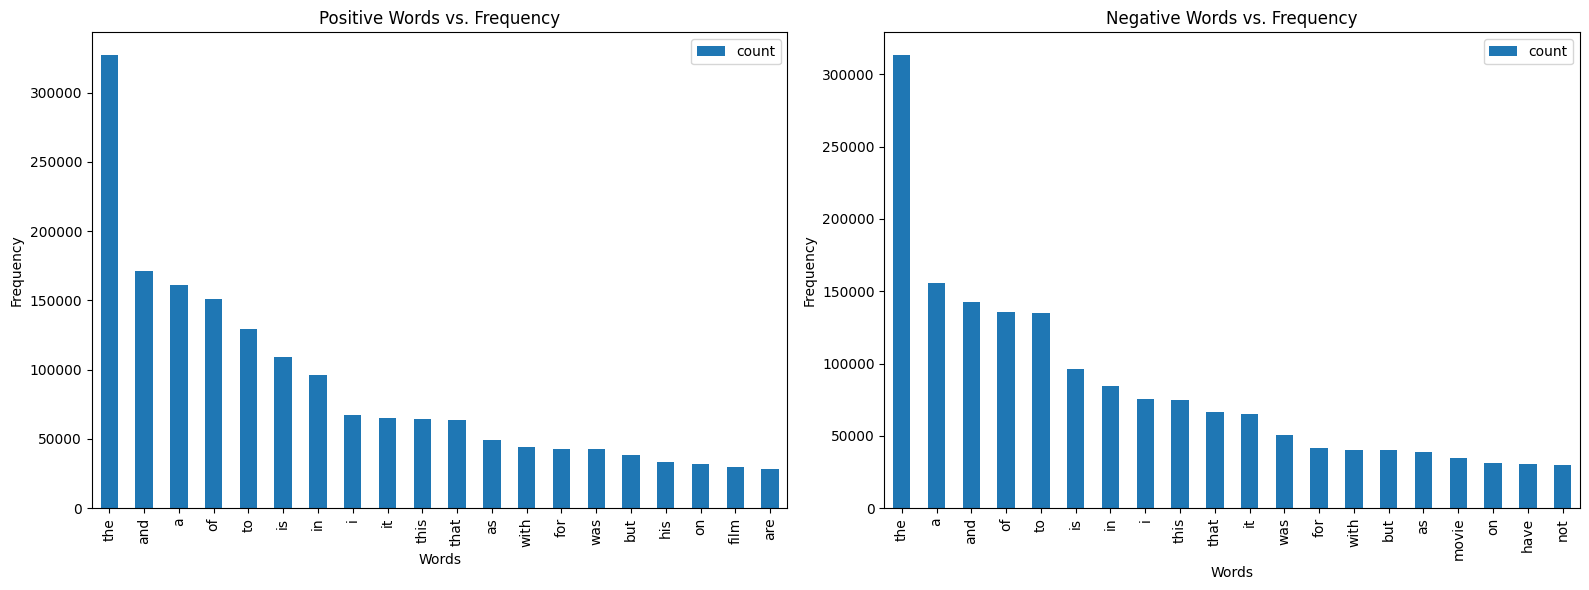

In [58]:
# Plot the word counts

pos_df = pd.DataFrame(pos_counts.most_common(20), columns=['words', 'count'])
neg_df = pd.DataFrame(neg_counts.most_common(20), columns=['words', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16,6)) # 1 row with 2 columns
pos_df.plot(kind='bar', x='words', y='count', xlabel='Words', ylabel='Frequency', title='Positive Words vs. Frequency', ax=axes[0])
neg_df.plot(kind='bar', x='words', y='count', xlabel='Words', ylabel='Frequency', title='Negative Words vs. Frequency', ax=axes[1])
plt.tight_layout()
plt.show()

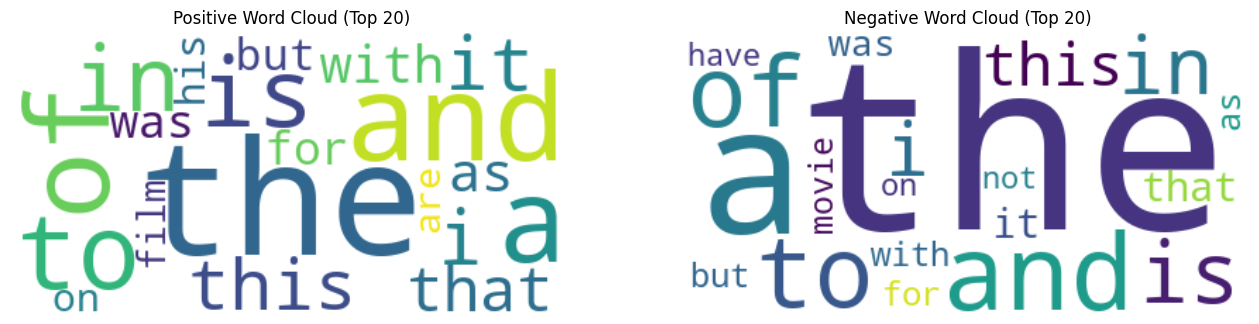

In [75]:
# WordCloud of the Same Statistics

# need to make into a dict
top20_pos = dict(pos_counts.most_common(20))
top20_neg = dict(neg_counts.most_common(20))

pos_wc = WordCloud(background_color="white").generate_from_frequencies(top20_pos)
neg_wc = WordCloud(background_color="white").generate_from_frequencies(top20_neg)

# plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(pos_wc, interpolation="bilinear")
axes[0].set_title("Positive Word Cloud (Top 20)")
axes[0].axis('off')
axes[1].imshow(neg_wc, interpolation="bilinear")
axes[1].set_title("Negative Word Cloud (Top 20)")
axes[1].axis('off')

plt.show()

In [64]:
# Add nltk stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keele\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [69]:
# No Stopwords time
pos_counts_ns = Counter(word for tokens in df_pos['tokens'] for word in tokens if word not in stop_words)
neg_counts_ns = Counter(word for tokens in df_neg['tokens'] for word in tokens if word not in stop_words)

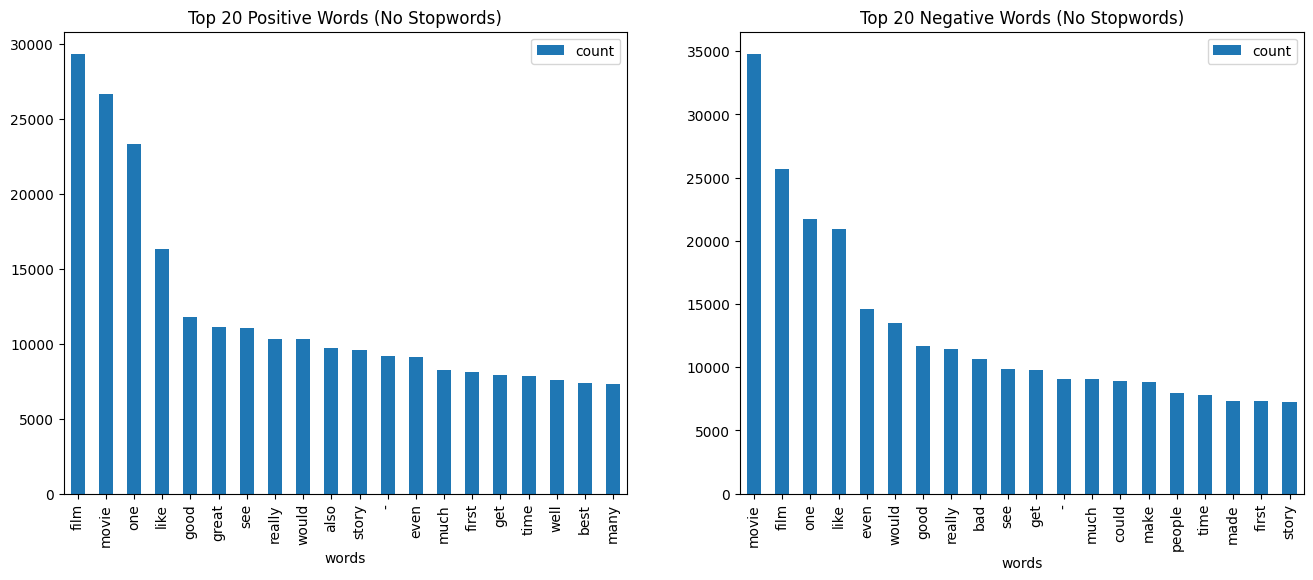

In [71]:
# Plot

pos_df_ns = pd.DataFrame(pos_counts_ns.most_common(20), columns=['words', 'count'])
neg_df_ns = pd.DataFrame(neg_counts_ns.most_common(20), columns=['words', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16,6))

pos_df_ns.plot(kind='bar', x='words', y='count', ax=axes[0], title='Top 20 Positive Words (No Stopwords)')
neg_df_ns.plot(kind='bar', x='words', y='count', ax=axes[1], title='Top 20 Negative Words (No Stopwords)')

plt.show()

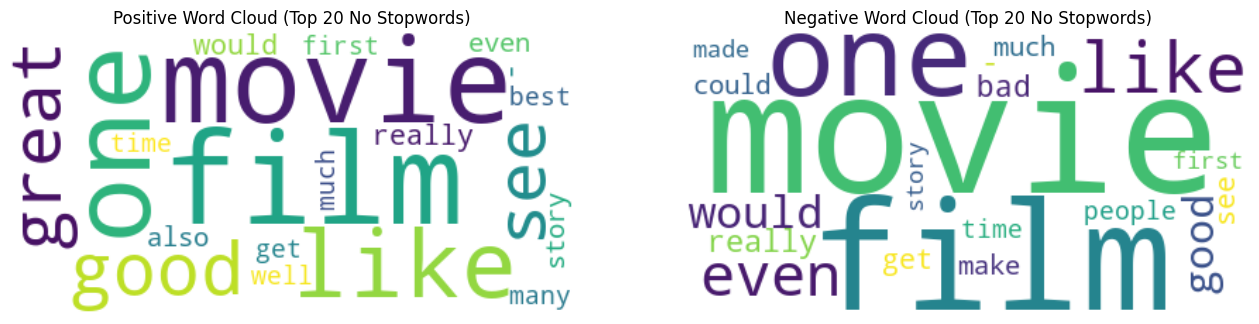

In [76]:
# WordCloud of the Same Statistics No Stopwords

# need to make into a dict
top20_pos_ns = dict(pos_counts_ns.most_common(20))
top20_neg_ns = dict(neg_counts_ns.most_common(20))

pos_wc_ns = WordCloud(background_color="white").generate_from_frequencies(top20_pos_ns)
neg_wc_ns = WordCloud(background_color="white").generate_from_frequencies(top20_neg_ns)

# plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(pos_wc_ns, interpolation="bilinear")
axes[0].set_title("Positive Word Cloud (Top 20 No Stopwords)")
axes[0].axis('off')
axes[1].imshow(neg_wc_ns, interpolation="bilinear")
axes[1].set_title("Negative Word Cloud (Top 20 No Stopwords)")
axes[1].axis('off')

plt.show()

## Cleaning and EDA Finished

### Cleaning
- Made the content in the review column of the imdb.reviews csv file lowercase and removed any html.
- Removed any leading or tailing whitespace as well, as well as multiple white spaces in a row.

### Word Counts
- Looked at the word counts and plotted a histogram showing the curve, along with the mean and median of the word count data.

### Raw Word Frequencies
The raw word frequency counts are dominated by stopwords (such as "the", "and", etc.). While these are the most frequent true words, they do not seem to give much insight. I also split the words between the positive and negative reviews to see if there is a difference.

- Common positive words include: "the", "and", "a", "of", etc.
- Common negative words include: "the", "a", "and", "of", etc.
- These were both plotted with bar charts and word clouds to give both accurate and visual representations

### No Stopword Frequencies
To remove the stopwords from the data, I installed NLTK's english stopword list so the true sentiment-driven vocabulary could emerge.
This shows the importants of preprocessing when preparing data.

- Common positive words include (excluding major similarities bewteen both): "good", "great", "story", "well", "best", etc.
- Common negative words include (excluding major similarities bewteen both): "bad", "make", "people", "made", "first", etc.

### Key Insight
Stopword removal improves interpretability of word frequency analysis.
The finding show that sentiment is somewhat tied to the presence of specific words.